# Caminhada Quântica vs Caminhada Clássica - Pablo Gullith

Neste notebook, vamos explorar a diferença entre a distribuição de probabilidade para uma caminhada quântica e uma caminhada clássica. Usaremos um código Python para simular ambas e comparar os resultados. Vamos também discutir a teoria física relacionada a essas caminhadas.

## 1. Teoria Física - Uma Breve Explicação

### Caminhada Clássica

Em uma caminhada clássica, uma partícula faz passos aleatórios em uma linha. A distribuição de probabilidade para a posição da partícula após um grande número de passos segue uma distribuição gaussiana (normal) devido ao Teorema Central do Limite. Isso ocorre porque, para um grande número de passos, a soma de muitas variáveis aleatórias independentes tende a se distribuir normalmente.

### Caminhada Quântica

Uma caminhada quântica é uma generalização quântica da caminhada clássica, onde a partícula está em um estado quântico superposto de todas as posições possíveis. Em vez de fazer passos aleatórios, a partícula evolui de acordo com a dinâmica de seu estado quântico. A distribuição de probabilidade da caminhada quântica pode mostrar interferências e padrões diferentes dos esperados na caminhada clássica, frequentemente exibindo uma forma mais complexa que pode se assemelhar a uma gaussiana em alguns casos.

Vamos agora explorar o código para calcular e comparar essas distribuições.


## Passo 1. Importação das Bibliotecas


In [2]:
import numpy as np  # Importa a biblioteca NumPy para manipulação de arrays e operações matemáticas
import matplotlib.pyplot as plt  # Importa a biblioteca Matplotlib para criar gráficos
from scipy.stats import norm  # Importa a função norm do módulo scipy.stats para a distribuição normal

## Passo 2. Definir a função Quantum Walk


In [4]:
def quantum_walk(t, initial_state):
    size = 2 * t + 1  # Define o tamanho do array para acomodar a caminhada, considerando o intervalo de -t a t
    alpha = np.zeros(size, dtype=complex)  # Inicializa o array alpha com zeros (tipos complexos)
    beta = np.zeros(size, dtype=complex)  # Inicializa o array beta com zeros (tipos complexos)
    
    mid = t  # Define o índice central
    if initial_state == '0':
        alpha[mid] = 1.0  # Define o estado inicial |0> no índice central
    elif initial_state == '1':
        beta[mid] = 1.0  # Define o estado inicial |1> no índice central
    else:
        raise ValueError("O estado inicial deve ser '0' ou '1'.")  # Levanta um erro se o estado inicial não for válido
    
    for _ in range(t):  # Executa o loop por t passos
        # Atualiza alpha e beta usando operações vetorizadas para melhorar a eficiência
        new_alpha = np.roll(alpha, shift=-1) + np.roll(beta, shift=-1)  # Calcula o novo alpha
        new_beta = np.roll(alpha, shift=1) - np.roll(beta, shift=1)  # Calcula o novo beta
        new_alpha /= np.sqrt(2)  # Normaliza o novo alpha
        new_beta /= np.sqrt(2)  # Normaliza o novo beta
        alpha, beta = new_alpha, new_beta  # Atualiza alpha e beta para o próximo passo
    
    # Calcula a distribuição de probabilidade final como a soma dos quadrados das magnitudes de alpha e beta
    prob_distribution_quantum = np.abs(alpha)**2 + np.abs(beta)**2
    prob_distribution_quantum /= prob_distribution_quantum.sum()  # Normaliza a distribuição para que a soma seja 1
    
    return prob_distribution_quantum  # Retorna a distribuição de probabilidade quântica

## Passo 3. Definir a função Classical Walk


In [5]:
def classical_walk(t):
    size = 2 * t + 1  # Define o tamanho do array para acomodar a caminhada, considerando o intervalo de -t a t
    positions = np.arange(-t, t+1)  # Cria um array de posições de -t a t
    mean = 0  # Define a média da distribuição normal como 0
    std_dev = np.sqrt(t)  # Define o desvio padrão da distribuição normal como sqrt(t)
    
    # Calcula a distribuição de probabilidade clássica usando a função norm.pdf
    prob_distribution_classical = norm.pdf(positions, loc=mean, scale=std_dev)
    prob_distribution_classical /= prob_distribution_classical.sum()  # Normaliza a distribuição para que a soma seja 1
    
    return prob_distribution_classical  # Retorna a distribuição de probabilidade clássica

## Passo 4. Parâmetros da Simulação

In [6]:
# Parâmetros da simulação
t = 100  # Número de passos na caminhada

# Calcula as distribuições de probabilidade
prob_distribution_quantum_0 = quantum_walk(t, '0')  # Caminhada quântica com estado inicial |0>
prob_distribution_quantum_1 = quantum_walk(t, '1')  # Caminhada quântica com estado inicial |1>
prob_distribution_classical = classical_walk(t)  # Caminhada clássica

## Passo 5. Gerar o Gráfico

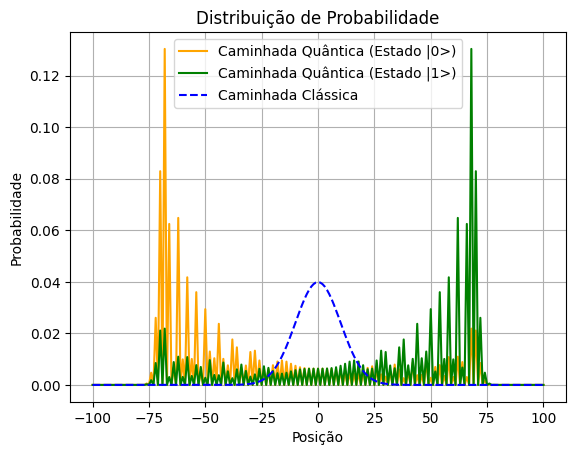

In [7]:
# Gera o gráfico
positions = np.arange(-t, t+1)  # Cria um array de posições de -t a t
plt.plot(positions, prob_distribution_quantum_0, color='orange', label='Caminhada Quântica (Estado |0>)')  # Plota a distribuição quântica para estado |0>
plt.plot(positions, prob_distribution_quantum_1, color='green', label='Caminhada Quântica (Estado |1>)')  # Plota a distribuição quântica para estado |1>
plt.plot(positions, prob_distribution_classical, color='blue', label='Caminhada Clássica', linestyle='--')  # Plota a distribuição clássica com linha tracejada
plt.title('Distribuição de Probabilidade')  # Define o título do gráfico
plt.xlabel('Posição')  # Define o rótulo do eixo x
plt.ylabel('Probabilidade')  # Define o rótulo do eixo y
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.legend()  # Adiciona uma legenda ao gráfico
plt.show()  # Exibe o gráfico

Comparação entre Caminhadas: No gráfico, as linhas contínuas laranja e verde representam as distribuições quânticas para os estados iniciais |0> e |1>. Já a linha azul tracejada mostra a distribuição clássica.

Interpretação dos Resultados: Observamos que a distribuição clássica segue uma curva gaussiana centrada, característica de uma caminhada aleatória. Já a distribuição quântica tem picos mais acentuados nas extremidades, evidenciando o fenômeno de interferência quântica.

Essa diferença é crucial, pois demonstra como a mecânica quântica permite que a partícula se espalhe de maneira diferente, potencialmente mais rápida, do que na caminhada clássica.